# 第6部　一般化線形モデル｜Pythonで学ぶ統計学入門

## 5章　ポアソン回帰

### 分析の準備

In [2]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline


In [3]:
# データの読み込み
beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


### 実装：ポアソン回帰

In [4]:
# モデル化
mod_pois = smf.glm("beer_number ~ temperature", beer, 
                   family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Fri, 23 Feb 2018   Deviance:                       5.1373
Time:                        11:41:01   Pearson chi2:                     5.40
No. Iterations:                     4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

### 実装：AICによるモデル選択

In [5]:
# Nullモデル
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer, 
    family=sm.families.Poisson()).fit()

In [7]:
# AICの比較
print("Nullモデル　　：", mod_pois_null.aic.round(3))
print("変数入りモデル：", mod_pois.aic.round(3))

Nullモデル　　： 223.363
変数入りモデル： 119.343


### 実装：回帰曲線の図示

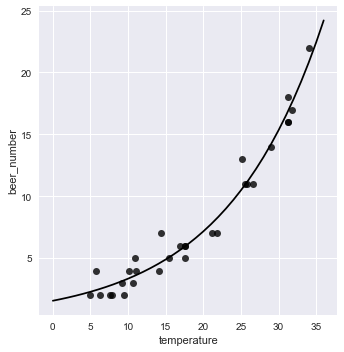

In [8]:
# 図示

# 予測値の作成
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

# 回帰直線を入れないlmplot
sns.lmplot(y="beer_number", x = "temperature", 
           data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
# 回帰曲線を上書き
plt.plot(x_plot, pred, color="black")

### 回帰係数の解釈

In [9]:
# 気温が1度の時の販売個数の期待値
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 気温が2度の時の販売個数の期待値
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 気温が1度気温が1度上がると、販売個数は何倍になるか
pred_2 / pred_1

0    1.079045
dtype: float64

In [10]:
# 係数のexpをとる
sp.exp(mod_pois.params["temperature"])

1.079